    Age     Fare  Sex  Cluster
0  22.0   7.2500    0        2
1  38.0  71.2833    1        1
2  26.0   7.9250    1        2
3  35.0  53.1000    1        2
4  35.0   8.0500    0        1


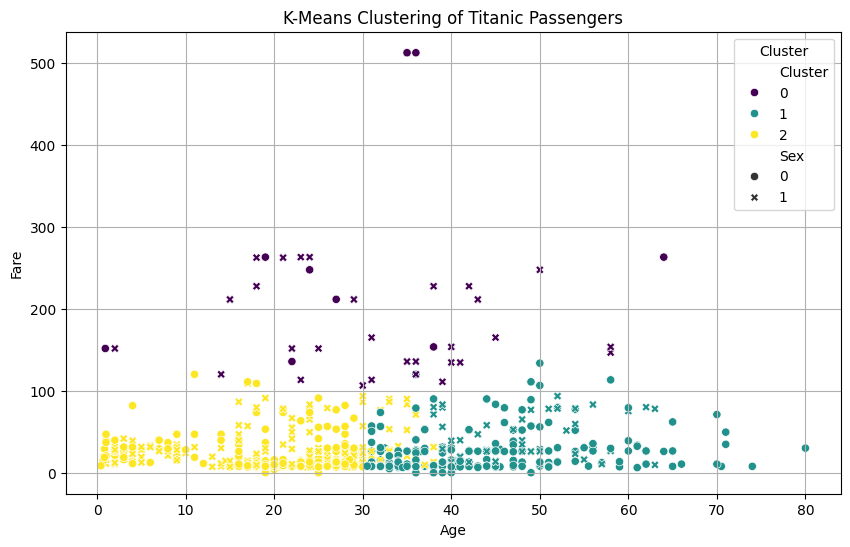

In [13]:
# K-mean k อะไรวะงง ลืมแล้ว
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Data Base
data = pd.read_csv('train.csv')
data = data[['Age', 'Fare','Sex']]
data['Sex'] = data['Sex'].map({'male':0,'female':1})
data.dropna(inplace=True)

X = data[['Age', 'Fare','Sex']]
sclaer = StandardScaler()
X_scaled = sclaer.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

data['Cluster'] = kmeans.labels_
print(data.head())

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Age', y='Fare', hue='Cluster', palette='viridis',style='Sex',markers={0:'o',1:'X'})
plt.title('K-Means Clustering of Titanic Passengers')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(title='Cluster',loc='upper right')
plt.grid()
plt.show()

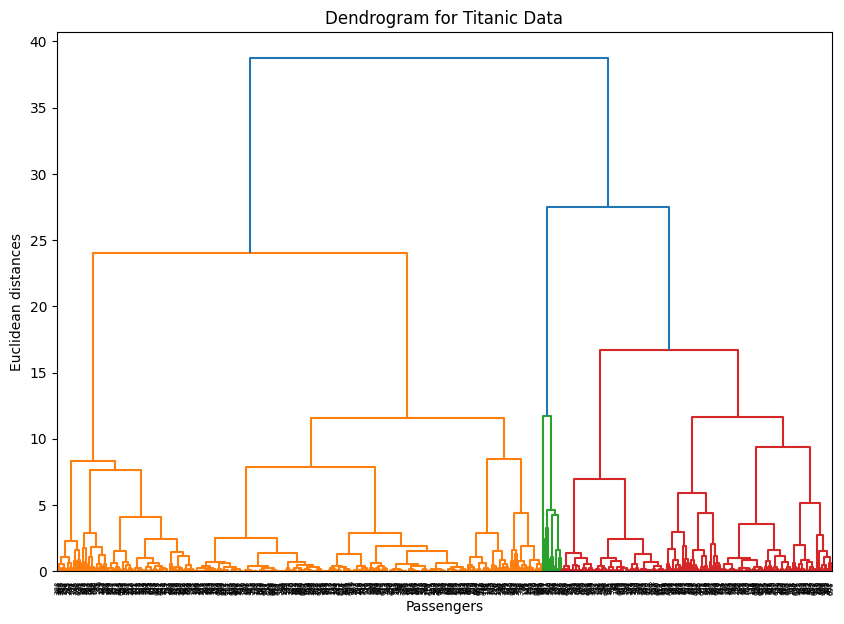

    Age     Fare  Sex  Cluster
0  22.0   7.2500    0        0
1  38.0  71.2833    1        1
2  26.0   7.9250    1        1
3  35.0  53.1000    1        1
4  35.0   8.0500    0        0


In [ ]:
# Agglomerative Clustering อันนี้รู้เรื่องเพราะตั้งใจเรียน
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

# Data Base
data = pd.read_csv('train.csv')
data = data[['Age', 'Fare','Sex']]
data['Sex'] = data['Sex'].map({'male':0,'female':1})
data.dropna(inplace=True)

# Data Preprocessing
X = data[['Age', 'Fare','Sex']]
sclaer = StandardScaler()
X_scaled = sclaer.fit_transform(X)

# Plot Graph
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title('Dendrogram for Titanic Data')
plt.xlabel('Passengers')
plt.ylabel('Euclidean distances')
plt.show()

# Fit Model การแบ่งกลุ่ม
n_clusters = 3
hc = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
y_hc = hc.fit_predict(X_scaled)
data['Cluster'] = y_hc
print(data.head())